# Telecom X - Análisis de Evasión de Clientes

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

Importación y manipulación de datos desde una API.
Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
Creación de visualizaciones estratégicas para identificar patrones y tendencias.
Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.

#📌 Extracción

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [3]:
url = 'https://raw.githubusercontent.com/sandrazuniga/Challenge_TelecomX/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [6]:
# Paso 1: Normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Paso 2: Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Paso 3: Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

# Paso 4: Verificar los cambios
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [8]:

df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)

In [9]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
df.isnull().sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [11]:
(df['cancelo'] == '').sum()

np.int64(224)

In [12]:
(df['gastos_totales'] == ' ').sum()

np.int64(11)

In [13]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)

In [14]:
(df['cancelo'] == '').sum()
(df['gastos_totales'] == ' ').sum()

np.int64(0)

In [15]:
df.isnull().sum()

,0
ID,0
cancelo,224
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [16]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])

In [17]:
df[['cancelo', 'gastos_totales']].isnull().sum()

,0
cancelo,0
gastos_totales,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   mayor_de_65              7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependentes        7032 non-null   object 
 6   meses_de_contrato        7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   object 
 11  Soporte_en_linea         7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  servicio_tv              7032

In [19]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [20]:
# Convertir a float
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)

In [22]:
# Convertir a str
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

In [23]:
# Convertirlas a string
df[vars_a_str] = df[vars_a_str].astype(str)

In [24]:
# creo una variable que contiene todas las variables que van a ser transformadas en booleanos

columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

/tmp/ipython-input-4120043378.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [25]:
# Transformación de variables a categoricas

columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

In [26]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

In [29]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [30]:
df[columnas_bool] = df[columnas_bool].astype(int)

In [31]:
df[columnas_bool].head()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,facturas_electronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   cancelo                  7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   mayor_de_65              7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependentes        7032 non-null   int64   
 6   meses_de_contrato        7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   servicio_internet        7032 non-null   object  
 10  seguridad_en_linea       7032 non-null   category
 11  Soporte_en_linea         7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  servicio_tv  

In [34]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [35]:
df.dtypes

,0
ID,object
cancelo,int64
genero,object
mayor_de_65,int64
tiene_pareja,int64
tiene_dependentes,int64
meses_de_contrato,int64
servicio_telefonico,object
lineas_multiples,category
servicio_internet,object


#📊 Carga y análisis

In [36]:
df.describe()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [37]:
# identifica variables categoricas

columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

['ID',
 'genero',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_en_linea',
 'Soporte_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'servicio_tv',
 'servicio_peliculas',
 'tipo_contrato',
 'metodo_pago']

In [38]:
# Realizar recuentos cruzados con cancelo

for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por ID ---
cancelo         0      1
ID                      
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

--- Porcentaje de evasión por genero ---
cancelo      0      1
genero               
Female   73.04  26.96
Male     73.80  26.20

--- Porcentaje de evasión por servicio_telefonico ---
cancelo                  0      1
servicio_telefonico              
No                   75.00  25.00
Yes                  73.25  26.75

--- Porcentaje de evasión por lineas_multiples ---
cancelo               0      1
lineas_multiples              
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65

--- Porcentaje de evasión por servicio_internet ---
cancelo                0      1

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Definimos los colores
AZUL = '#1f77b4'         # azul corporativo
VERDE = '#2ca02c'        # verde corporativo
GRIS = '#4D4D4D'         # gris para títulos

In [41]:
def cancelacion_tipo_internet():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('servicio_internet')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='servicio_internet',
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (sin palette -> sin warning)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de Internet', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 12
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.tight_layout()



  return plt

In [42]:
def cancelacion_tipo_contrato():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('tipo_contrato')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='tipo_contrato',
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (alternancia azul/verde)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de contrato', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 12
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Fondo gris
  ax.set_facecolor('#f0f0f0')  # Fondo del gráfico
  plt.gcf().set_facecolor('#f0f0f0')  # Fondo de la figura completa

  plt.tight_layout()

  return plt


def cancelacion_servicios_adicionales():

  # Lista de servicios adicionales
  servicios = ['seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico']
  titulos = ['Seguridad en línea', 'Soporte en línea', 'Protección de dispositivos', 'Soporte técnico']

  # Orden lógico de categorías
  orden = ['No', 'Yes', 'No internet service']

  # Crear figura y ejes
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Cancelación según servicios adicionales', fontsize=20, color=GRIS)
  fig.patch.set_facecolor('#f0f0f0')  # fondo de la figura

  # Gráficas
  for i, (servicio, titulo) in enumerate(zip(servicios, titulos)):
      fila = i // 2
      col = i % 2
      ax = axs[fila, col]
      ax.set_facecolor('#f0f0f0')  # fondo del gráfico individual

      # Gráfica de barras sin usar hue
      plot = sns.barplot(
      x=servicio,
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None,
      hue=servicio,           # agregamos hue (aunque no usaremos leyenda)
      legend=False,           # ocultamos leyenda
      ax=ax,
      palette=[AZUL, VERDE, AZUL]
  )


      # Título
      ax.set_title(titulo, fontsize=16, color=GRIS)

      # Etiqueta del eje Y solo en la primera columna
      if col == 0:
          ax.set_ylabel('')
          ax.set_yticklabels([])  # suprimir etiquetas y
          ax.tick_params(axis='y', length=0)  # sin ticks eje y
      else:
          ax.set_ylabel('')
          ax.set_yticklabels([])
          ax.tick_params(axis='y', length=0)

      # Eje X
      ax.set_xlabel('')
      ax.tick_params(axis='x', labelsize=12, colors=AZUL)

      # Bordes
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

      # Rango común para comparar
      ax.set_ylim(0, 50)

      # Etiquetas sobre las barras
      for container in ax.containers:
          ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.95])  # para que el título no se encime

  return plt

In [43]:
# Realizar recuentos cruzados con cancelo
variables_binarias = ['mayor_de_65', 'tiene_pareja', 'tiene_dependentes']

for col in variables_binarias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por mayor_de_65 ---
cancelo          0      1
mayor_de_65              
0            76.35  23.65
1            58.32  41.68

--- Porcentaje de evasión por tiene_pareja ---
cancelo           0      1
tiene_pareja              
0             67.02  32.98
1             80.28  19.72

--- Porcentaje de evasión por tiene_dependentes ---
cancelo                0      1
tiene_dependentes              
0                  68.72  31.28
1                  84.47  15.53


In [44]:
def cancelacion_bin():

  plt.figure(figsize=(14, 4))


  for i, var in enumerate(variables_binarias):
      plt.subplot(1, 4, i+1)

      # Calcular porcentaje de cancelación
      data = df.groupby(var)['cancelo'].mean() * 100
      categorias = data.index
      valores = data.values

      # Convertimos a DataFrame para usar x=hue
      temp_df = pd.DataFrame({var: categorias, 'cancelacion': valores})

      # Gráfico de barras con colores alternos
      sns.barplot(
          data=temp_df,
          x=var,
          y='cancelacion',
          hue=var,
          palette=[AZUL, VERDE],
          legend=False
      )

      # Texto sobre las barras
      for j, v in enumerate(valores):
          plt.text(j, v + 2, f'{v:.1f}%', ha='center', fontsize=12, color=AZUL)

      # Limites y personalización
      plt.ylim(0, 100)
      plt.title(var.replace('_', ' ').capitalize(), fontsize=16, )

      # Eje Y sin etiquetas ni ylabel
      plt.tick_params(axis='y', labelleft=False)
      plt.ylabel('')

      # Eje X personalizado
      plt.xlabel('')
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()

  return plt


In [45]:
# Variables numericas

columnas_numericas = [['gastos_mensuales','gastos_totales','cuentas_diarias']]

# Promedios y desviaciones por grupo
df.groupby('cancelo')[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']].agg(['mean', 'std'])


gastos_mensuales            gastos_totales               \
                    mean        std           mean          std   
cancelo                                                           
0              61.307408  31.094557    2555.344141  2329.456984   
1              74.441332  24.666053    1531.796094  1890.822994   

        cuentas_diarias            
                   mean       std  
cancelo                            
0              2.043580  1.036485  
1              2.481378  0.822202

In [47]:
print(columnas_numericas)
print(type(columnas_numericas))

[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']]
<class 'list'>


In [48]:
columnas_numericas = columnas_numericas[0]

In [49]:
def boxplot_cancelacion(columnas_numericas):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, col in enumerate(columnas_numericas):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='cancelo',
      y=col,
      hue='cancelo',
      data=df,
      showfliers=False,
      palette=[AZUL, VERDE],
      legend=False
     )



      # Título en GRIS
      plt.title(f'{col.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=GRIS)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=AZUL)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eje Y
      plt.ylabel(col.replace('_', ' ').capitalize(), fontsize=12, color=AZUL)
      plt.tick_params(axis='y', labelsize=12, colors=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt


In [50]:
def cancelacion_segun_meses():

  # Boxplot para meses de contrato
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='cancelo', y='meses_de_contrato', data=df, showfliers=False)
  plt.title('Meses de contrato según cancelación', fontsize=18, color=GRIS)
  plt.xlabel('Canceló')
  plt.ylabel('Meses de contrato')

  # Eliminar bordes superior, derecho e izquierdo
  ax = plt.gca()
  ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


  plt.tight_layout()
  return plt

#📄Informe final

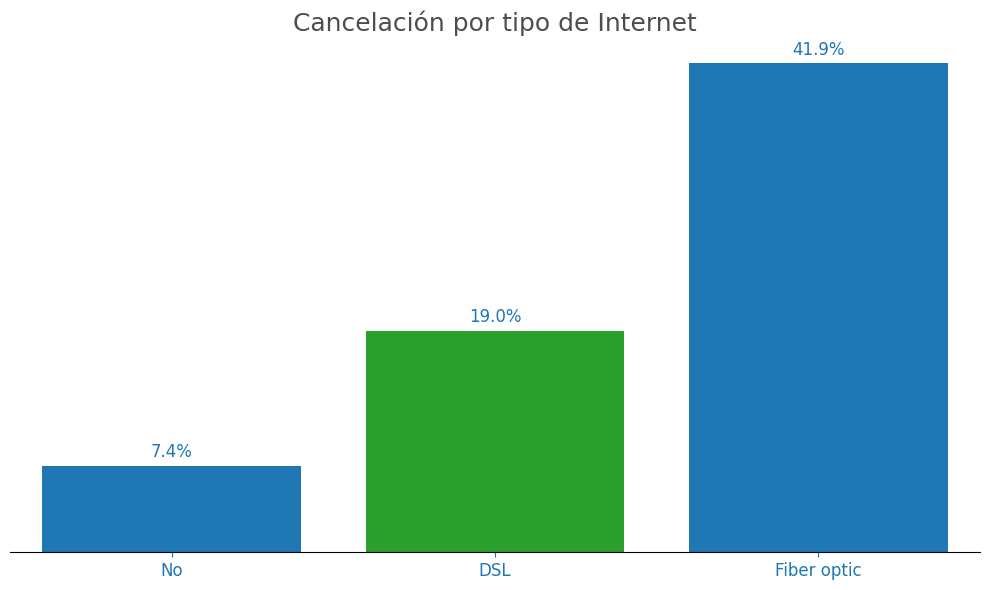

In [51]:
cancelacion_tipo_internet().show()

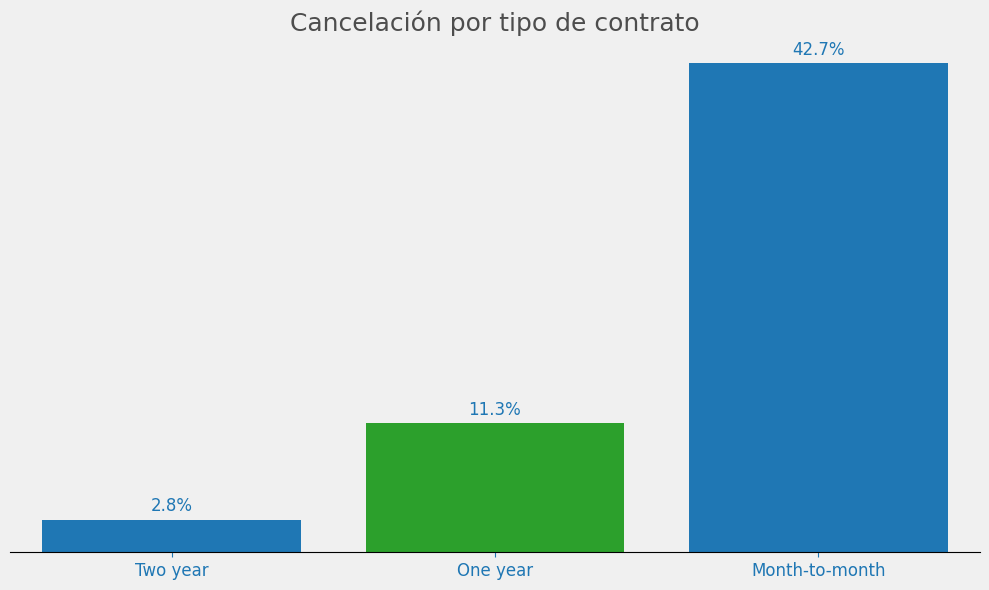

In [52]:
 cancelacion_tipo_contrato().show()

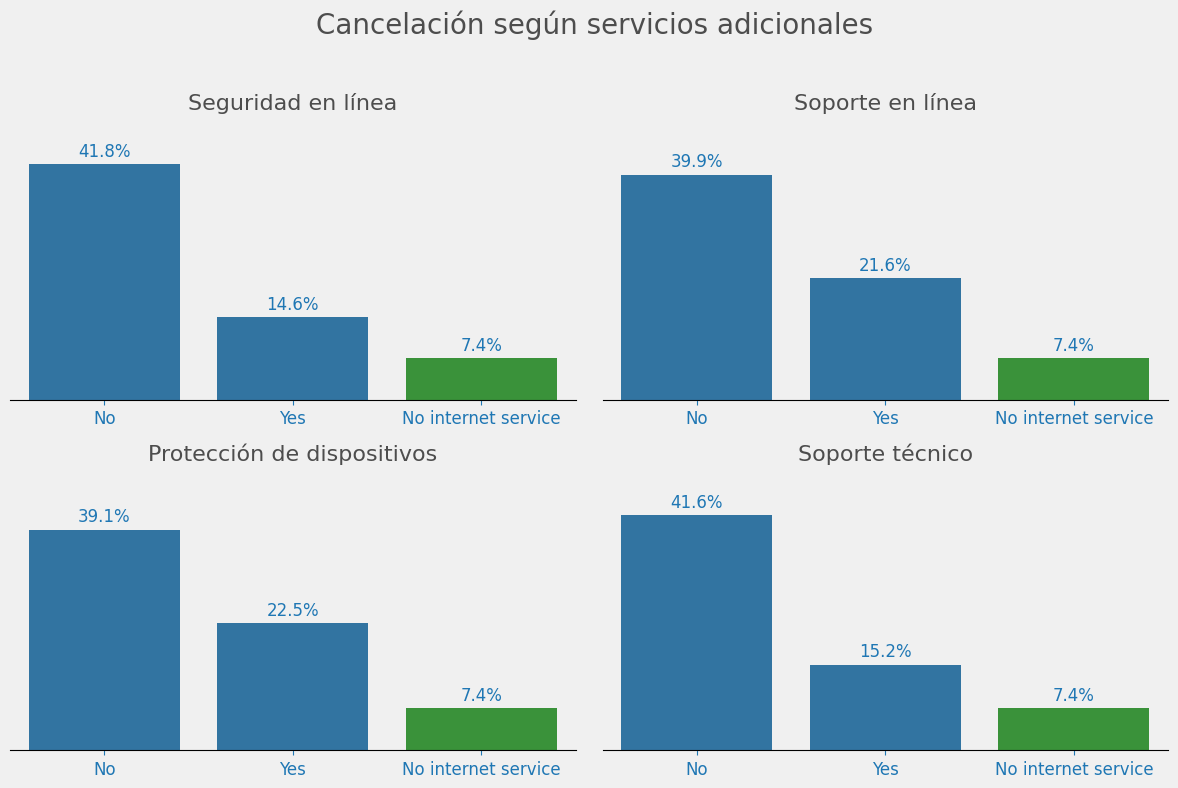

In [53]:
cancelacion_servicios_adicionales().show()

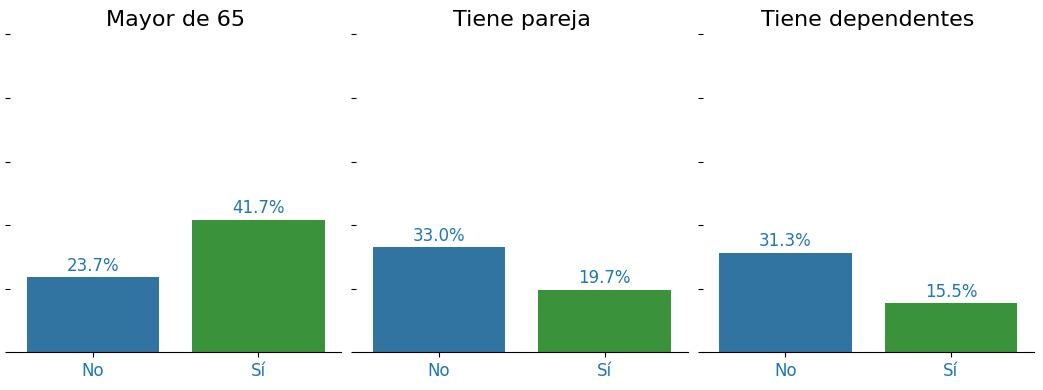

In [54]:
cancelacion_bin().show()

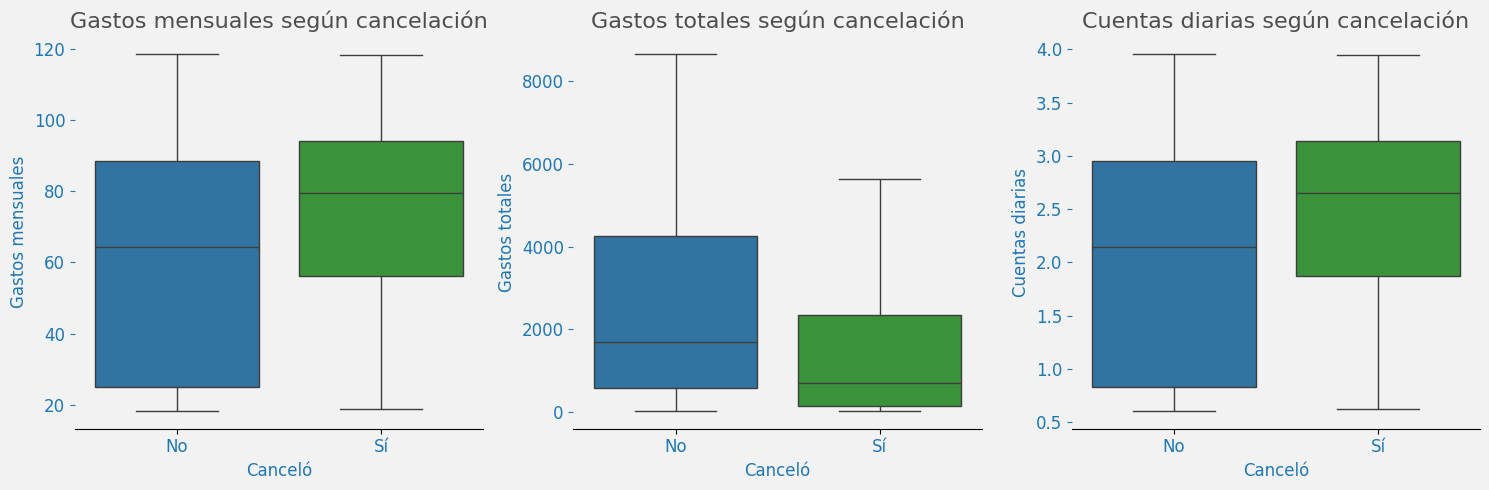

In [55]:
boxplot_cancelacion(columnas_numericas).show()

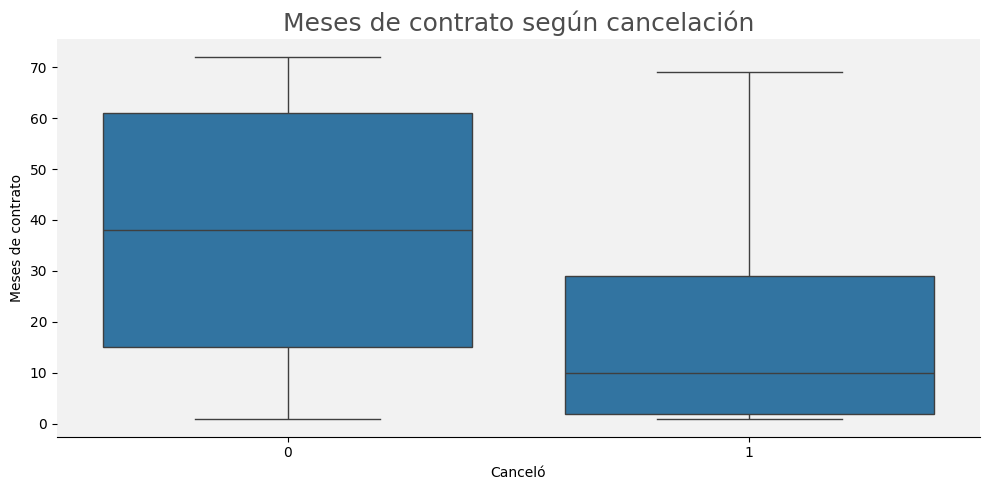

In [56]:
cancelacion_segun_meses().show()

🔹 Conclusiones e Insights:
🧪 Principales hallazgos

Mayor cancelación con fibra óptica: Los usuarios con internet de fibra óptica presentan un porcentaje de cancelación más alto (41.9%).

Contratos mes a mes tienen mayor evasión: Las personas con contratos mensuales tienen una tasa de cancelación elevada (42.7%), en comparación con otros tipos de contrato.

Menor fidelización sin servicios adicionales: Los clientes que no cuentan con servicios adicionales cancelan con mayor frecuencia:

Seguridad en línea: 41.8%

Soporte en línea: 39.9%

Protección de dispositivos: 39.1%

Soporte técnico: 41.6%

Edad avanzada y mayor tasa de cancelación: Los clientes mayores de 65 años tienen una tasa de cancelación mucho más alta (41.7%) que los más jóvenes.

Estado civil influye: Los clientes sin pareja cancelan más (~33%) que aquellos con pareja.

Menos dependientes, más cancelación: Los clientes sin personas a su cargo cancelan en mayor proporción (31.3%) que los que sí tienen dependientes.

Mayor gasto mensual, mayor probabilidad de cancelación: A medida que aumenta el gasto mensual, también lo hace la tasa de cancelación. Esto puede deberse a la percepción de que el servicio es costoso.

Clientes nuevos cancelan más: Quienes cancelaron tienen un total facturado significativamente menor, lo que indica que llevaban poco tiempo como clientes.

Más uso no garantiza fidelidad: Los clientes que cancelaron presentan ligeramente más conexiones diarias. Aunque la diferencia no es muy marcada, podría sugerir que usaban el servicio activamente pero no estaban satisfechos.

Contratos cortos = más cancelaciones: Los clientes que cancelaron tienden a tener contratos mucho más cortos (mediana ~10 meses), lo que sugiere menor compromiso o una etapa temprana de prueba del servicio.

🛠️ ¿Cómo reducir la evasión?

Revisar el servicio de fibra óptica: Identificar y corregir posibles fallas técnicas. Ofrecer alternativas tecnológicas (como otro tipo de conexión) en zonas problemáticas para evitar cancelaciones.

Incentivar contratos más duraderos: Ofrecer beneficios como descuentos o promociones para quienes eligen contratos más largos, sin imponer cláusulas de permanencia rígidas.

Incluir servicios adicionales sin recargo: Crear paquetes integrales que incluyan servicios como soporte técnico, seguridad en línea y protección de dispositivos, mejorando así la experiencia del cliente sin aumentar su factura.

Enfocarse en el público mayor: Diseñar ofertas específicas para adultos mayores, con contenidos o canales afines a sus intereses (por ejemplo, películas clásicas o programación religiosa).

Promociones para personas solas o sin dependientes: Brindar beneficios especiales como descuentos o servicios gratuitos adicionales a este grupo, que muestra mayor tendencia a cancelar.

Reducir la percepción de altos costos: Ajustar tarifas o implementar opciones de pago flexibles, como pagos quincenales, para mejorar la percepción de accesibilidad y evitar que los usuarios sientan que están pagando de más.

🔹 Recomendaciones:
Con base en los hallazgos obtenidos, se proponen las siguientes estrategias para reducir la tasa de cancelación y aumentar la fidelización de clientes:

Optimizar la experiencia de nuevos clientes:
Desarrollar un programa de bienvenida que acompañe a los nuevos usuarios durante los primeros meses.

Realizar encuestas de satisfacción temprana para detectar problemas a tiempo y evitar cancelaciones tempranas.

Mejorar la percepción de valor del servicio:
Reestructurar los paquetes para incluir servicios adicionales sin aumentar el precio final.

Comunicar de forma más clara los beneficios incluidos en el servicio (soporte, seguridad, protección).

Implementar opciones de pago más flexibles (ej. pagos quincenales o personalizados) para clientes con alto gasto mensual.

Fidelizar a los clientes con contratos mes a mes:
Ofrecer incentivos exclusivos para quienes migren de contrato mensual a uno de mayor duración (como beneficios permanentes o tarifas especiales).

Crear un sistema de recompensas o puntos por antigüedad, aplicable incluso en contratos mensuales.

Segmentar ofertas según el perfil del cliente:
Para adultos mayores: ofrecer contenido personalizado, soporte preferencial, atención al cliente dedicada y capacitación básica para el uso del servicio.

Para personas solteras o sin dependientes: crear campañas enfocadas en independencia, flexibilidad y autosuficiencia, con promociones diseñadas para su estilo de vida.

Auditar y mejorar el servicio de fibra óptica:
Analizar reclamos técnicos y evaluar la infraestructura por zonas geográficas.

Priorizar mejoras en las áreas con mayores tasas de cancelación asociadas a fibra óptica.

Capacitar al personal técnico para garantizar instalaciones sin inconvenientes.

Monitorear la actividad del usuario:
Identificar patrones de uso que preceden a la cancelación (como reducción en conexiones diarias).

Usar esta información para activar alertas preventivas o campañas personalizadas de retención.

Crear una unidad de análisis de cancelaciones:
Implementar un sistema continuo de análisis de evasión para identificar nuevas tendencias.

Hacer seguimiento mensual de métricas clave (edad, tipo de contrato, servicios adicionales, antigüedad, etc.).